In [23]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data_training_8000.csv"  #file name 
#csvfile = "Data_actor2000.pt.csv"  #file name 

In [24]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction_patch,default_friction,loc_patch,size_patch,Rewards,Stop_Distance
0,0,40.48,0.54,0.7,38.39,18.34,-109.27,45.88
1,1,41.26,0.78,0.7,63.74,19.34,-103.66,50.38
2,2,32.93,0.44,0.7,71.17,17.96,-158.55,55.66
3,3,28.99,0.80,0.7,39.17,5.69,-242.40,72.34
4,4,43.50,0.88,0.7,41.77,11.84,-116.66,46.67


In [3]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [25]:
failed = data_test[data_test['Stop_Distance'] <= 5]
passed = data_test[data_test['Stop_Distance'] >5]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

failed.to_csv("crashed.csv",index=False)
failed.head()

Size of crashes : 85
Size of success : 7916
Percentage of crash cases:1.06 %
Percentage of not crashed cases:98.94 %


,Episode,Kick_Speed,friction_patch,default_friction,loc_patch,size_patch,Rewards,Stop_Distance
6,6,58.10,0.79,0.7,55.82,13.13,-1035.25,-6.30
7,7,59.33,0.76,0.7,46.25,20.43,-1038.65,-9.26
13,13,58.21,0.85,0.7,45.17,23.48,-38.53,4.31
46,46,53.91,0.68,0.7,64.00,15.19,-76.08,3.25
53,53,58.23,0.49,0.7,36.13,15.75,-1048.66,-10.04


In [26]:
#passed.to_csv("not_crashed.csv",index=False  )
#passed.head()

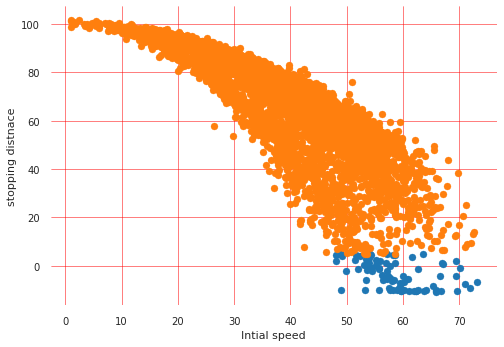

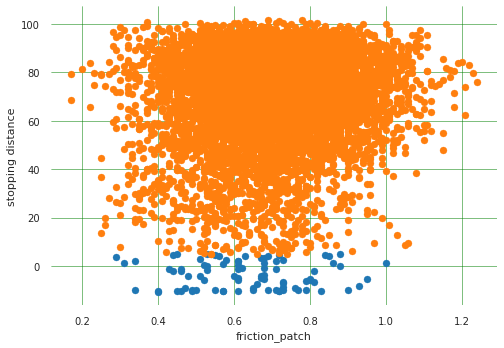

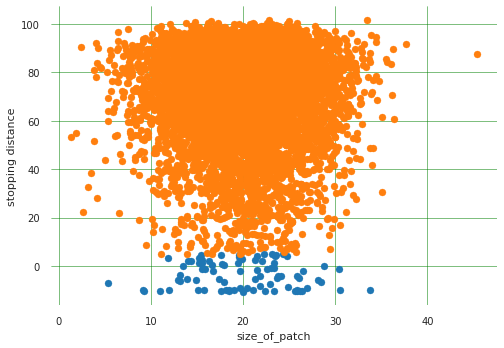

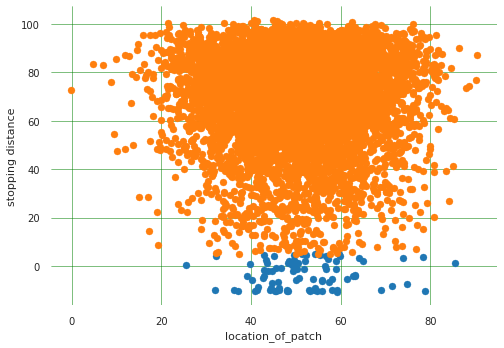

In [27]:
fig=plt.figure
plt.scatter(failed["Kick_Speed"],failed["Stop_Distance"],label='Line 2')
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.xlabel("Intial speed")
plt.ylabel("stopping distnace")
plt.show()

fig=plt.figure
plt.scatter(failed["friction_patch"],failed["Stop_Distance"],label='Line 2')
plt.scatter(passed["friction_patch"],passed["Stop_Distance"],label='Line 2')
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.xlabel("friction_patch")
plt.ylabel("stopping distance")
plt.show()

fig=plt.figure
plt.scatter(failed["size_patch"],failed["Stop_Distance"],label='Line 2')
plt.scatter(passed["size_patch"],passed["Stop_Distance"],label='Line 2')
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.xlabel("size_of_patch")
plt.ylabel("stopping distance")
plt.show()

fig=plt.figure
plt.scatter(failed["loc_patch"],failed["Stop_Distance"],label='Line 2')
plt.scatter(passed["loc_patch"],passed["Stop_Distance"],label='Line 2')
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.xlabel("location_of_patch")
plt.ylabel("stopping distance")
plt.show()




In [28]:
data_test.loc[data_test['Stop_Distance'] <= 5, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 5, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction_patch,default_friction,loc_patch,size_patch,Rewards,Stop_Distance,test
0,0,40.48,0.54,0.7,38.39,18.34,-109.27,45.88,0.0
1,1,41.26,0.78,0.7,63.74,19.34,-103.66,50.38,0.0
2,2,32.93,0.44,0.7,71.17,17.96,-158.55,55.66,0.0
3,3,28.99,0.80,0.7,39.17,5.69,-242.40,72.34,0.0
4,4,43.50,0.88,0.7,41.77,11.84,-116.66,46.67,0.0


Total number of episodes: 8001
Number of Pass: 3987
Number of fail: 13


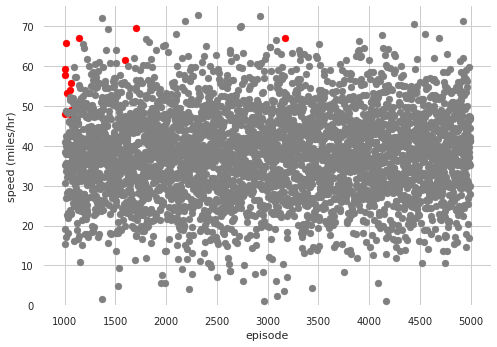

In [50]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=1000
end=5000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0,75])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()

Failures:  [7, 6, 9, 9, 7, 7, 3, 3, 4, 9, 9, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0]


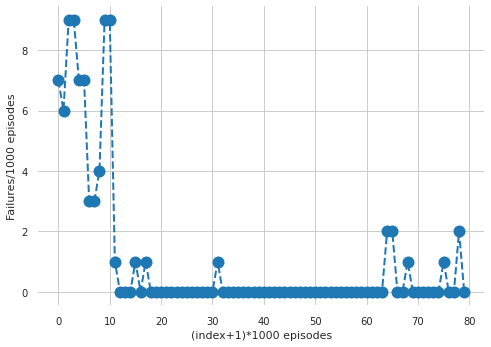

In [34]:
step=100
range_f=end/step
failure=[]
fig, ax = plt.subplots()
for i in range(int(range_f)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   

In [41]:
#data for AVF training:
iteration_start=6250
iteration_end=8000
data=data_test[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]].values,axis=0)
np.savez('stdmean.npz',std=std, mean=mean)
data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed","friction_patch","loc_patch","size_patch"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

std is: [5.05181403e+02 1.07369212e+01 1.51963863e-01 1.21198886e+01
 5.03431261e+00]
Mean is: [7.12450000e+03 3.78198571e+01 7.07885714e-01 5.02691886e+01
 2.00153714e+01]


,Episode,Kick_Speed,friction_patch,loc_patch,size_patch,test
6250,-1.731061,0.894124,0.803575,1.294633,1.921738,0.0
6251,-1.729082,-0.189985,0.211328,-1.806880,0.316752,0.0
6252,-1.727102,0.127610,-1.367994,-2.400120,0.318738,0.0
6253,-1.725123,0.086630,0.606159,1.108988,-0.567182,0.0
6254,-1.723143,-2.435508,0.803575,-1.000767,-0.888974,0.0


In [43]:
#AVF Training 


X=data[["Episode","Kick_Speed","friction_patch","loc_patch","size_patch",]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.997):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(5,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;


(1750, 5)
(1750,)
(5,)
Epoch 1/500
147/147 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.9923
Epoch 2/500
147/147 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9949
Epoch 3/500
147/147 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9949
Epoch 4/500
147/147 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9949
Epoch 5/500
147/147 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9949
Epoch 6/500
147/147 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9949
Epoch 7/500
147/147 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9949
Epoch 8/500
147/147 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9957
Epoch 9/500
126/147 [========================>.....] - ETA: 0s - loss: 0.0060 - accuracy: 0.9970
Reached 99% accuracy so cancelling training!
147/147 [==================

In [44]:
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)

37/37 [==============================] - 0s 602us/step - loss: 0.0064 - accuracy: 0.9965
test loss, test acc: [0.006365138106048107, 0.9965397715568542]


In [45]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [46]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [47]:
new_model = tf.keras.models.load_model('saved_model/my_model')

(5000, 2)
Data : [[2000.           47.24378337]
 [2000.           49.23064169]
 [2000.           41.54551137]
 ...
 [2000.           20.9484816 ]
 [2000.           32.21236383]
 [2000.           49.57694064]]


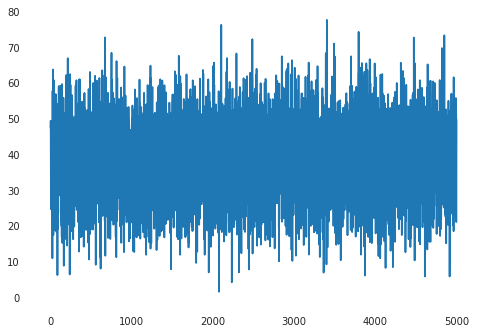

In [18]:
samples_per_iteration=5000
random_seed=np.random.randint(1,10000)
np.random.seed(random_seed)
candidate_initial_speed=[]
for i in range(samples_per_iteration): 
    #candidate_initial_speed =(9* np.random.randn(samples_per_iteration, 1) + 38).reshape(-1,1)
    candidate_initial_speed.append(np.random.normal(38,11))

candidate_initial_speed=np.array(candidate_initial_speed).reshape(-1,1)
Episode=2000*np.ones((samples_per_iteration,1)).reshape(-1,1)

data=np.concatenate((Episode,candidate_initial_speed),axis=1)
print(data.shape)
print('Data :',data)

container = np.load('stdmean.npz')
data_normalised=np.divide(np.subtract(data,container['mean']),container['std'])
plt.plot(candidate_initial_speed)

In [19]:
predicted_y=new_model.predict(data_normalised,batch_size=8)
max_value=np.amax(predicted_y)
print(max_value)
print(predicted_y.shape)
array_position=np.where(predicted_y==max_value)[0]
print(array_position)
#print(predicted_y)
#print(np.sort(predicted_y, axis=None) )
data_final=np.concatenate((data[array_position,:],predicted_y[array_position,:]),axis=1)
print(data_final)

0.99951375
(5000, 1)
[3403]
[[2.00000000e+03 7.74727185e+01 9.99513745e-01]]


In [74]:
data_final[0][1]

74.1494809483109

In [2]:
a=[1 ,2, 3];
print(a[0:1])

[1]
